##### Improving Customer Satisfaction through Automated Review Sentiment Analysis
##### Overview
###### * You are a product manager at an e-commerce company like Amazon. Your company receives thousands of customer reviews daily for various products. While ratings are available, they don’t always capture customer sentiment accurately — especially when the text and rating conflict.
#####  Business Problem:
###### * Your goal is to build an automated Sentiment Analysis System to classify incoming product reviews as Positive or Negative. This will help:
###### * Monitor product performance in real-time
###### * Identify products with sudden spikes in negative feedback
###### * Improve customer satisfaction by addressing complaints faster
##### Dataset
###### * Each row is one Amazon customer review for some product.
###### * The dataset has been pre-labeled — so you already know if the review is positive or negative.
###### * This is a typical sentiment analysis dataset, often used for training or testing natural language processing (NLP) models.
##### 📊 Rows:
###### 10,000 customer reviews
##### 📑 Columns:
##### 1.label
###### oType: Text (Categorical)
###### oValues: pos (positive) or neg (negative)
###### oWhat it means: The sentiment of the review — whether the customer’s feedback is positive or negative.
##### 2.review
###### oType: Text
###### oValues: Actual text of the review written by the customer.
###### oWhat it means: What the customer said about the product in their own words — for example: “Excellent Soundtrack! I love it!”

##### Tasks
##### 1.Data Cleaning: Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).
##### 2.Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.
##### 3. Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.
##### 4.Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-score.


##### Submission Guidelines
###### * Your submission should include a comprehensive report and the complete codebase.
###### * Your code should be well-documented and include comments explaining the major steps.
##### Evaluation Criteria
###### * Correct implementation of data preprocessing and feature extraction.
###### * Accuracy and robustness of the classification model.
###### * Depth and insightfulness of the sentiment analysis.
###### * Clarity and thoroughness of the evaluation and discussion sections.
###### * Overall quality and organization of the report and code.
###### Good luck, and we look forward to your insightful analysis of the given dataset!


In [69]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\moulika\AppData\Roaming\nltk

True

In [70]:
# 1. IMPORTS
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only once)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

STOPWORDS = set(stopwords.words("english"))
LEMMATIZER = WordNetLemmatizer()

# 2. LOAD DATA
df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\19. NLP\\amazonreviews.tsv", sep="\t", quoting=3, keep_default_na=False)

print("Original shape:", df.shape)
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moulika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original shape: (10000, 2)
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  "Amazing!: This soundtrack is my favorite musi...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...


In [71]:
# 3. HANDLE MISSING VALUES
# Convert to string to avoid errors
df["review"] = df["review"].astype(str)

# Count missing/empty
empty_count = df["review"].str.strip().eq("").sum()
print("Empty reviews before cleaning:", empty_count)

# Remove empty review rows
df = df[df["review"].str.strip() != ""]
print("Shape after removing empty reviews:", df.shape)

Empty reviews before cleaning: 0
Shape after removing empty reviews: (10000, 2)


In [72]:
# 4. REMOVE DUPLICATES
dup_count = df.duplicated(subset=["review", "label"]).sum()
print("Duplicates found:", dup_count)

df = df.drop_duplicates(subset=["review", "label"]).reset_index(drop=True)
print("Shape after removing duplicates:", df.shape)

Duplicates found: 0
Shape after removing duplicates: (10000, 2)


In [73]:
# 5. TEXT CLEANING FUNCTION
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')
NON_ALPHANUMERIC = re.compile(r'[^a-zA-Z ]+')
MULTI_SPACE = re.compile(r'\s+')

def clean_text(text):
    text = text.lower()                                 # lowercase
    text = URL_PATTERN.sub("", text)                    # remove URLs
    text = NON_ALPHANUMERIC.sub(" ", text)              # remove punctuation
    text = MULTI_SPACE.sub(" ", text).strip()           # fix multiple spaces

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    tokens = [t for t in tokens if t not in STOPWORDS]

    # Lemmatize
    tokens = [LEMMATIZER.lemmatize(t) for t in tokens]

    return " ".join(tokens)


In [74]:
# 6. APPLY PREPROCESSING
print("\nCleaning all reviews... (this may take ~10–20 seconds)")

df["review_clean"] = df["review"].apply(clean_text)

# Show before–after example
print("\nExample BEFORE:")
print(df["review"].iloc[0])
print("\nExample AFTER:")
print(df["review_clean"].iloc[0])


Cleaning all reviews... (this may take ~10–20 seconds)

Example BEFORE:
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^

Example AFTER:
stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen


In [75]:
# 7. OUTPUT FINAL DATA
print("\nFinal cleaned dataset shape:", df.shape)
print(df.head())


Final cleaned dataset shape: (10000, 3)
  label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  "Amazing!: This soundtrack is my favorite musi...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   

                                        review_clean  
0  stuning even non gamer sound track beautiful p...  
1  best soundtrack ever anything reading lot revi...  
2  amazing soundtrack favorite music time hand in...  
3  excellent soundtrack truly like soundtrack enj...  
4  remember pull jaw floor hearing played game kn...  


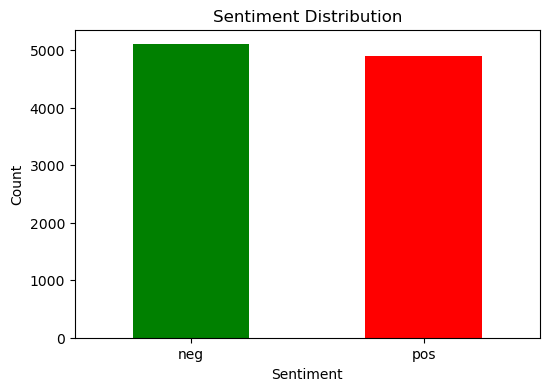


Top 20 Positive Words:
book: 3933
great: 2137
one: 1997
good: 1671
read: 1628
like: 1342
movie: 1330
time: 1189
love: 1045
would: 956
get: 948
well: 947
story: 875
really: 832
best: 813
first: 724
make: 711
year: 703
work: 701
much: 664

Top 20 Negative Words:
book: 3760
one: 2193
movie: 1784
like: 1592
would: 1465
time: 1321
get: 1299
read: 1275
good: 1163
even: 910
buy: 842
really: 783
much: 782
work: 781
story: 781
make: 776
money: 767
bad: 764
first: 760
product: 706


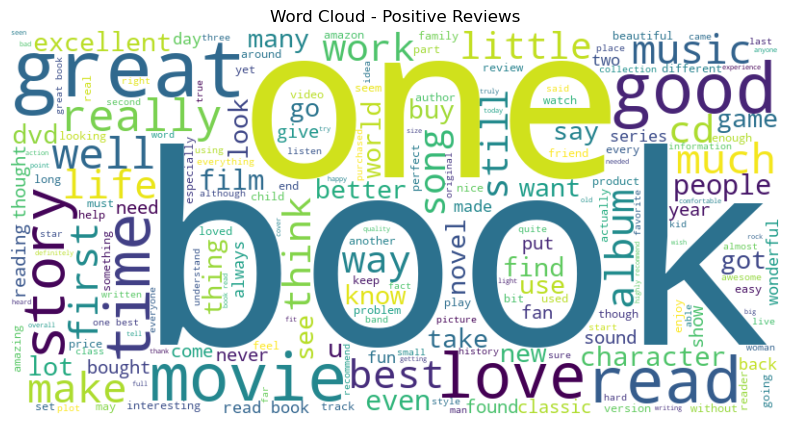

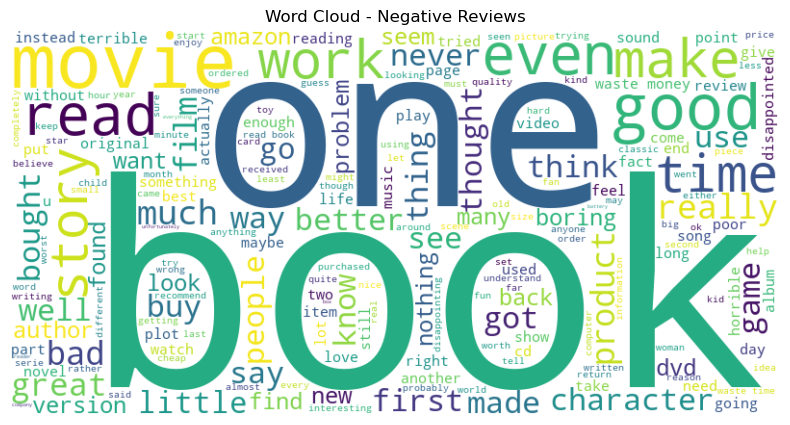

In [76]:
# EXPLORATORY DATA ANALYSIS (EDA)
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# 1. SENTIMENT DISTRIBUTION
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2. MOST COMMON WORDS (POSITIVE & NEGATIVE)
def get_top_words(text_series, n=20):
    """Returns top n most frequent words from a text column."""
    counter = Counter()
    for text in text_series:
        counter.update(text.split())
    return counter.most_common(n)

top_pos_words = get_top_words(df[df.label == "pos"]["review_clean"])
top_neg_words = get_top_words(df[df.label == "neg"]["review_clean"])

print("\nTop 20 Positive Words:")
for word, count in top_pos_words:
    print(f"{word}: {count}")

print("\nTop 20 Negative Words:")
for word, count in top_neg_words:
    print(f"{word}: {count}")

# 3. WORD CLOUDS FOR POSITIVE & NEGATIVE REVIEWS
# Generate word clouds only if text exists
pos_text = " ".join(df[df.label == "pos"]["review_clean"])
neg_text = " ".join(df[df.label == "neg"]["review_clean"])

# Word Cloud – Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

# Word Cloud – Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(neg_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()

In [77]:
# model_dev.py
import os
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer

# artifacts / key names
ART = Path("/mnt/data/artifacts")
ART.mkdir(parents=True, exist_ok=True)
TFIDF_VECT = ART / "tfidf_vectorizer.joblib"
TFIDF_LOGREG = ART / "tfidf_logreg.joblib"
TFIDF_SVM = ART / "tfidf_svm.joblib"

W2V_MODEL = ART / "word2vec.model"
W2V_MLP = ART / "w2v_mlp.joblib"

BERT_NAME = "all-MiniLM-L6-v2"           # encoder name
BERT_SVM = ART / "bert_svm.joblib"
BERT_LOGREG = ART / "bert_logreg.joblib"

nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

# simple preprocessing
URL_RE = re.compile(r"https?://\S+|www\.\S+")
PUNCT_RE = re.compile(r"[^a-zA-Z0-9\s]")

def simple_preprocess(text):
    t = str(text).lower()
    t = URL_RE.sub(" ", t)
    t = PUNCT_RE.sub(" ", t)
    t = " ".join(t.split())
    # remove stopwords tokens
    tokens = [tok for tok in t.split() if tok not in STOPWORDS and len(tok) > 1]
    return " ".join(tokens)

# load dataset (expects columns 'review' and 'label' with 'pos'/'neg')
def load_df(path="/mnt/data/amazonreviews.tsv"):
    df = pd.read_csv(path, sep="\t", quoting=3, keep_default_na=False)
    if "review_clean" not in df.columns:
        df["review_clean"] = df["review"].astype(str).apply(simple_preprocess)
    return df

# ---------------- TF-IDF + LogisticRegression / SVM ----------------
def train_tfidf_models(df, label_col="label"):
    X = df["review_clean"].values
    y = (df[label_col] == "pos").astype(int).values
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    vec = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
    Xtr_tfidf = vec.fit_transform(Xtr)
    Xte_tfidf = vec.transform(Xte)
    # Logistic Regression
    logreg = LogisticRegression(max_iter=1000, solver="saga")
    logreg.fit(Xtr_tfidf, ytr)
    joblib.dump(vec, TFIDF_VECT)
    joblib.dump(logreg, TFIDF_LOGREG)
    ypred = logreg.predict(Xte_tfidf)
    res_log = {"acc": accuracy_score(yte, ypred), "f1": f1_score(yte, ypred), "report": classification_report(yte, ypred, output_dict=True)}
    # Linear SVM
    svm = LinearSVC(max_iter=10000)
    svm.fit(Xtr_tfidf, ytr)
    joblib.dump(svm, TFIDF_SVM)
    ypred_svm = svm.predict(Xte_tfidf)
    res_svm = {"acc": accuracy_score(yte, ypred_svm), "f1": f1_score(yte, ypred_svm), "report": classification_report(yte, ypred_svm, output_dict=True)}
    return {"logreg": res_log, "svm": res_svm}

# ---------------- Word2Vec + MLP (average word vectors) ----------------
def train_w2v_mlp(df, label_col="label", embed_size=100, window=5, min_count=2, epochs=5):
    texts = [t.split() for t in df["review_clean"].values]
    w2v = Word2Vec(sentences=texts, vector_size=embed_size, window=window, min_count=min_count, workers=4)
    w2v.save(str(W2V_MODEL))
    def avg_vec(tokens):
        vs = [w2v.wv[t] for t in tokens if t in w2v.wv]
        return np.mean(vs, axis=0) if vs else np.zeros(embed_size)
    X = np.vstack([avg_vec(t) for t in texts])
    y = (df[label_col] == "pos").astype(int).values
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=200, random_state=42)
    mlp.fit(Xtr, ytr)
    joblib.dump(mlp, W2V_MLP)
    ypred = mlp.predict(Xte)
    return {"acc": accuracy_score(yte, ypred), "f1": f1_score(yte, ypred), "report": classification_report(yte, ypred, output_dict=True)}

# ---------------- BERT (SentenceTransformers) embeddings -> SVM / LogReg ----------------
def train_bert_models(df, label_col="label", encoder_name=BERT_NAME):
    encoder = SentenceTransformer(encoder_name)
    texts = df["review_clean"].tolist()
    embeddings = encoder.encode(texts, batch_size=64, show_progress_bar=True)
    y = (df[label_col] == "pos").astype(int).values
    Xtr, Xte, ytr, yte = train_test_split(embeddings, y, test_size=0.2, stratify=y, random_state=42)
    svm = LinearSVC(max_iter=10000)
    svm.fit(Xtr, ytr)
    joblib.dump(svm, BERT_SVM)
    ypred = svm.predict(Xte)
    res_svm = {"acc": accuracy_score(yte, ypred), "f1": f1_score(yte, ypred), "report": classification_report(yte, ypred, output_dict=True)}
    logreg = LogisticRegression(max_iter=1000, solver="saga")
    logreg.fit(Xtr, ytr)
    joblib.dump(logreg, BERT_LOGREG)
    ypred_l = logreg.predict(Xte)
    res_log = {"acc": accuracy_score(yte, ypred_l), "f1": f1_score(yte, ypred_l), "report": classification_report(yte, ypred_l, output_dict=True)}
    return {"svm": res_svm, "logreg": res_log}

# ---------------- convenience train-all ----------------
def train_all(path="/mnt/data/amazonreviews.tsv"):
    df = load_df(path)
    out = {}
    out["tfidf"] = train_tfidf_models(df)
    out["w2v"] = train_w2v_mlp(df)
    out["bert"] = train_bert_models(df)
    joblib.dump(out, ART / "train_summary.joblib")
    return out

# ---------------- prediction helper (loads artifacts lazily) ----------------
def predict_text(text, model_key="tfidf_logreg"):
    text_clean = simple_preprocess(text)
    if model_key.startswith("tfidf"):
        vec = joblib.load(TFIDF_VECT)
        if model_key == "tfidf_logreg":
            clf = joblib.load(TFIDF_LOGREG)
        else:
            clf = joblib.load(TFIDF_SVM)
        X = vec.transform([text_clean])
        pred = clf.predict(X)[0]
        # some classifiers support decision_function or predict_proba
        score = None
        if hasattr(clf, "decision_function"):
            score = float(clf.decision_function(X)[0])
        elif hasattr(clf, "predict_proba"):
            score = float(clf.predict_proba(X)[0,1])
        return {"label": "pos" if int(pred)==1 else "neg", "score": score}
    if model_key.startswith("w2v"):
        w2v = Word2Vec.load(str(W2V_MODEL))
        mlp = joblib.load(W2V_MLP)
        toks = text_clean.split()
        vs = [w2v.wv[t] for t in toks if t in w2v.wv]
        emb = np.mean(vs, axis=0).reshape(1,-1) if vs else np.zeros((1, w2v.vector_size))
        pred = mlp.predict(emb)[0]
        score = None
        if hasattr(mlp, "predict_proba"):
            score = float(mlp.predict_proba(emb)[0,1])
        return {"label": "pos" if int(pred)==1 else "neg", "score": score}
    if model_key.startswith("bert"):
        encoder = SentenceTransformer(BERT_NAME)
        if model_key == "bert_svm":
            clf = joblib.load(BERT_SVM)
        else:
            clf = joblib.load(BERT_LOGREG)
        emb = encoder.encode([text_clean])
        pred = clf.predict(emb)[0]
        score = None
        if hasattr(clf, "decision_function"):
            score = float(clf.decision_function(emb)[0])
        elif hasattr(clf, "predict_proba"):
            score = float(clf.predict_proba(emb)[0,1])
        return {"label": "pos" if int(pred)==1 else "neg", "score": score}
    raise ValueError("Unknown model_key. Options: tfidf_logreg, tfidf_svm, w2v_mlp, bert_svm, bert_logreg")

# ---------------- example usage ----------------
if __name__ == "__main__":
    # 1) Train all (uncomment to run training)
    # print(train_all("/mnt/data/amazonreviews.tsv"))

    # 2) Example prediction (after training & artifacts saved)
    example = "This product exceeded my expectations — great quality and battery life."
    # example output (model files must exist)
    # print(predict_text(example, "tfidf_logreg"))
    print("Module loaded. Call train_all() to train models or predict_text(text, model_key) to predict.")

Module loaded. Call train_all() to train models or predict_text(text, model_key) to predict.


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Load dataset
df = pd.read_csv("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\19. NLP\\amazonreviews.tsv", sep="\t")

# Basic cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=["review"], inplace=True)

# Pipeline: TF-IDF + Logistic Regression
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(max_iter=200))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="pos")

print("Test Accuracy:", acc)
print("Test F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation (5-fold)
cv_scores = cross_val_score(model, df["review"], df["label"], cv=5, scoring="f1_macro")
print("5-Fold CV F1 Macro:", cv_scores.mean())

Test Accuracy: 0.852
Test F1 Score: 0.8477366255144033

Classification Report:
               precision    recall  f1-score   support

         neg       0.85      0.86      0.86      1019
         pos       0.86      0.84      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

5-Fold CV F1 Macro: 0.8356175670959918
